In [ ]:
! pip install pandas matplotlib seaborn scikit-learn 

## Import required Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Busines Understanding 

## Load and preprocess data

In [31]:

df = pd.read_csv('churn_data.csv')

# Data preprocessing
df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['PhoneService', 'Contract', 'PaymentMethod'], drop_first=True)

df.head()
df.tail()

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,24,84.80,1990.50,0,True,True,False,False,False,True
7039,72,103.20,7362.90,0,True,True,False,True,False,False
7040,11,29.60,346.45,0,False,False,False,False,True,False
7041,4,74.40,306.60,1,True,False,False,False,False,True
7042,66,105.65,6844.50,0,True,False,True,False,False,False


## Split data and standardize features

In [32]:

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train a logistic regression model

In [33]:

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

model = LogisticRegression(random_state=75)
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.80
Confusion Matrix:
[[1373  171]
 [ 256  313]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1544
           1       0.65      0.55      0.59       569

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



## Plot Confusion matrix

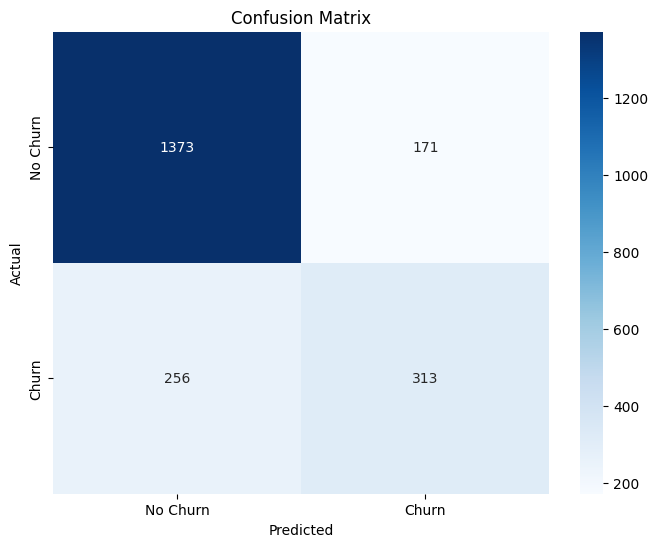

In [34]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Data Understanding - EDA

## Histogram for MonthlyCharges

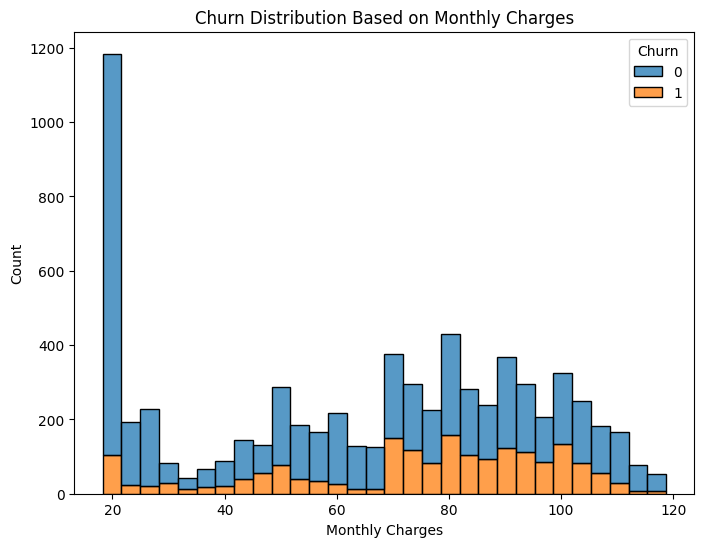

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Churn Distribution Based on Monthly Charges')
plt.show()

## Bar plots for categorical columns

PhoneService_Yes                         object
Contract_One year                        object
Contract_Two year                        object
PaymentMethod_Credit card (automatic)    object
PaymentMethod_Electronic check           object
PaymentMethod_Mailed check               object
Churn                                     int64
dtype: object


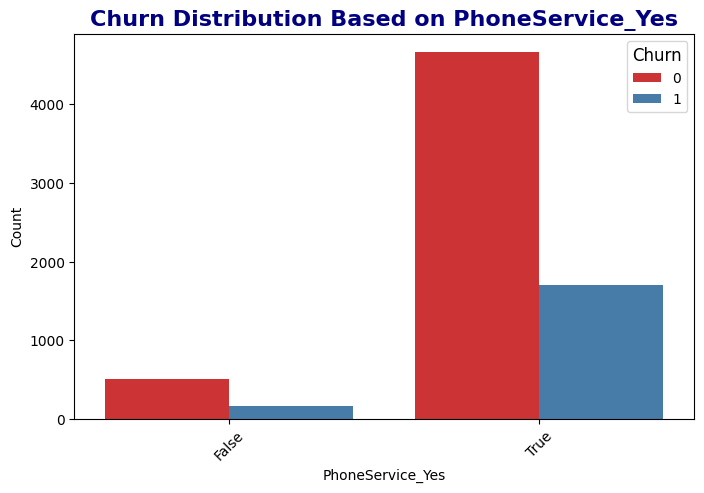

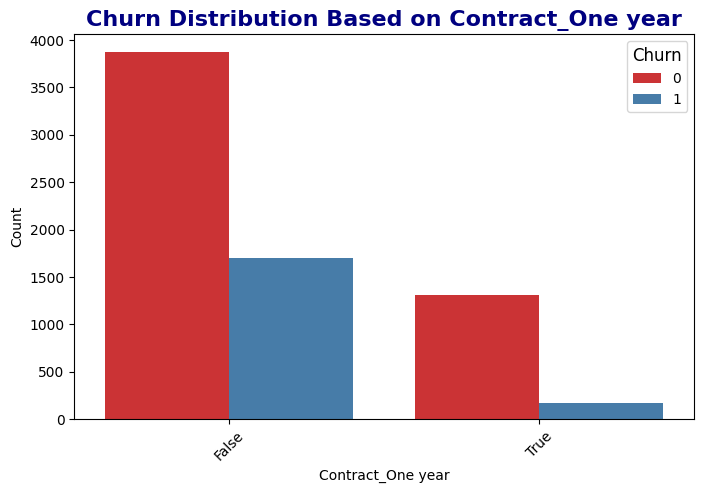

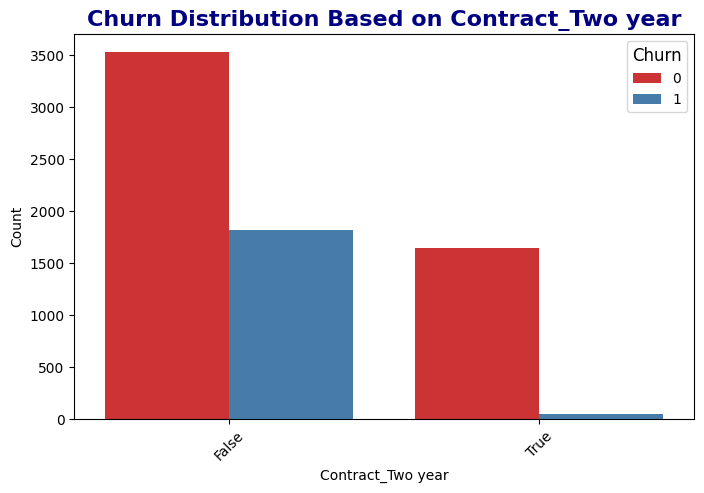

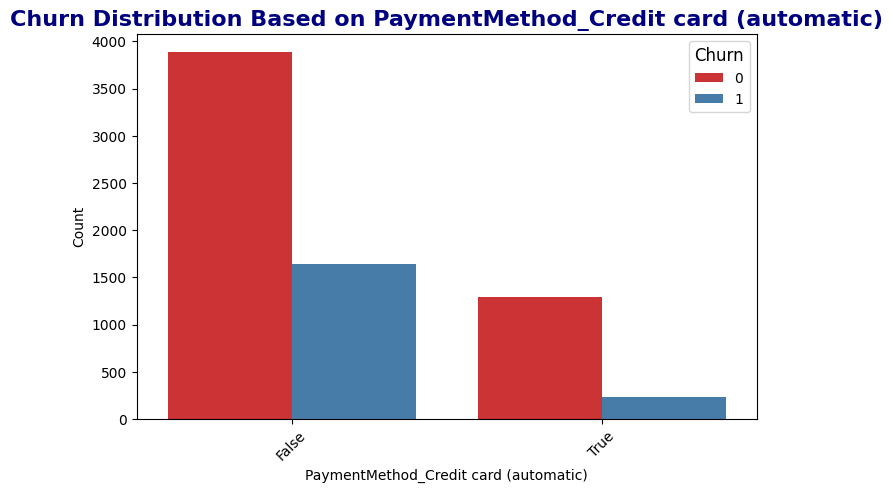

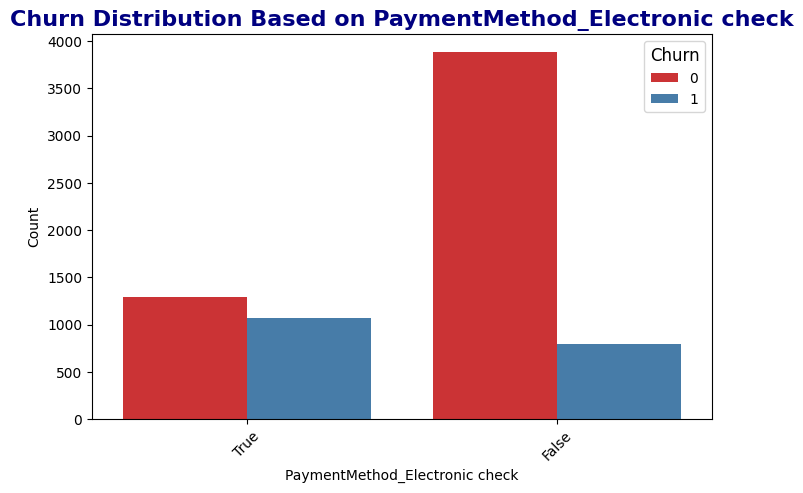

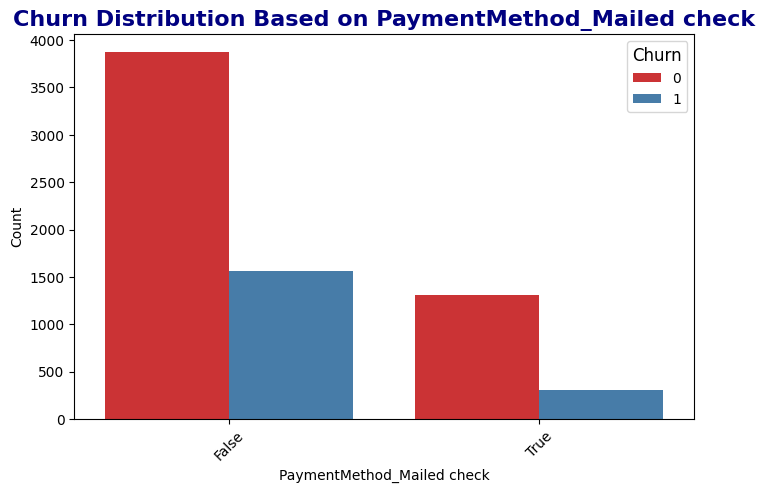

In [36]:
categorical_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year',
                        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Convert boolean columns to strings
bool_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year',
                'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for column in bool_columns:
    df[column] = df[column].astype(str)

# Check data types of columns used in countplot
print(df[categorical_columns + ['Churn']].dtypes)

# Bar plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Churn', palette='Set1')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Churn Distribution Based on {column}', fontsize=16, fontweight='bold', color='navy')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', title_fontsize='12', loc='upper right')
    plt.show()

## Scatter plot with color-coded churn status

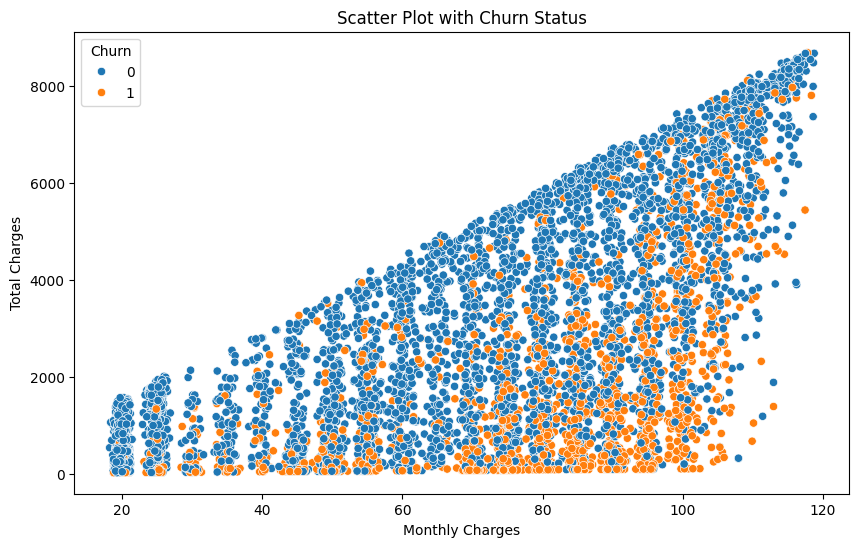

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Scatter Plot with Churn Status')
plt.show()

## Line graph for churn proportions over tenure

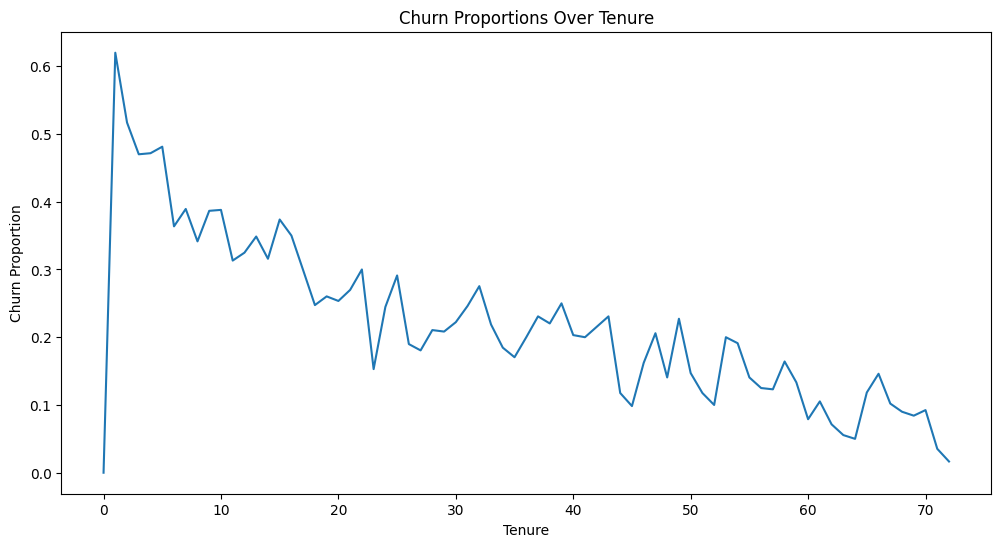

In [38]:
churn_proportions = df.groupby('tenure')['Churn'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=churn_proportions.index, y=churn_proportions.values)
plt.xlabel('Tenure')
plt.ylabel('Churn Proportion')
plt.title('Churn Proportions Over Tenure')
plt.show()

## Pairplot for numeric columns

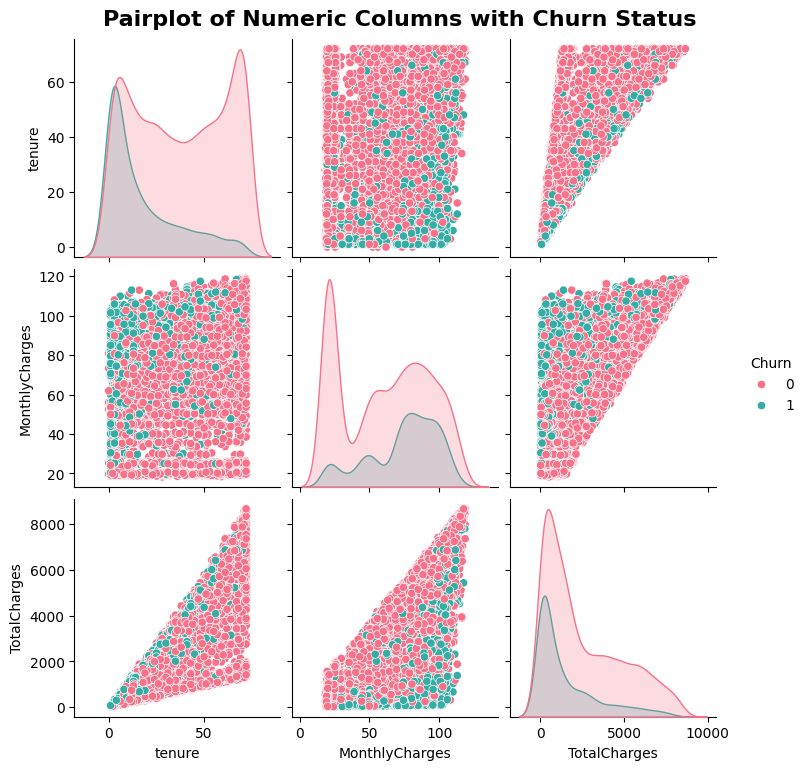

In [39]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[numeric_columns + ['Churn']], hue='Churn', palette='husl')
plt.suptitle('Pairplot of Numeric Columns with Churn Status', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Analysis and Interpretation

## Model Evaluation Metrics
Accuracy: 0.80 

**Confusion Matrix**
[[1373 171]
 [256 313]]

**Classification Report**
```shell 
	precision	 recall     f1-score   support
0       0.84      0.89      0.87      	1544
1       0.65      0.55      0.59       	569
```

```shell
accuracy                         0.80      2113
macro avg     0.74     0.72      0.73      2113
weighted avg   0.79    0.80      0.79      2113
```
**Interpretation**
Accuracy - The model achieved an accuracy of 79%, which represents the overall correct predictions out of the total predictions.
Confusion Matrix - The confusion matrix provides a detailed breakdown of the model's predictions
    True Negatives (TN) for class 0 (non-churn): 1373
    True Positives (TP) for class 1 (churn): 313
    False Positives (FP): 171 (Predicted as non-churn but actually churn)
    False Negatives (FN): 256 (Predicted as churn but actually non-churn)

**Classification Report**

```shell 
Precision (class 0): 0.84 - 84% of the predicted non-churn cases were correct.

Recall (class 0): 0.89 - Out of all actual non-churn cases, the model identified 89% of them.

F1-score (class 0): 0.87 - A balanced measure considering both precision and recall for non-churn class.

Precision (class 1): 0.65 - 65% of the predicted churn cases were correct.

Recall (class 1): 0.55 - Out of all actual churn cases, the model identified 55% of them.

F1-score (class 1): 0.59 - A balanced measure considering both precision and recall for the churn class.
```
The model performs well in predicting non-churn cases (class 0) with high precision (84%) and recall (89%), as indicated by the high F1-score (0.87). However, the model's performance for predicting churn cases (class 1) is not as strong, with lower precision (65%), recall (55%), and F1-score (0.59).

## Histogram for MonthlyCharges
The histogram depicts the distribution of monthly charges for both churned and non-churned customers.The stacked bars represent the counts of customers at different monthly charge levels.

**Interpretation**

**Monthly Charges Distribution**

The majority of customers have monthly charges in the lower range.

There is a peak around lower monthly charges, indicating a significant number of customers with lower subscription costs.

There is a smaller peak around higher monthly charges, suggesting another segment of customers with higher subscription plans.

**Churn Distribution**

The stacked bars show how churn is distributed across different monthly charge levels.
Customers with lower monthly charges seem to have a higher proportion of churn.

**Business Implication**

Customers with lower monthly charges are more likely to churn. This could be due to dissatisfaction with lower-tier plans or competitors offering better deals.
The company might want to explore strategies to retain customers with lower monthly charges, such as promotions or targeted marketing.

## Bar Plots for Categorical Columns

The bar plots show the distribution of churn for different categories in categorical columns (PhoneService, Contract, PaymentMethod).

**Interpretation**

**PhoneService**

Customers with PhoneService are more prevalent.
The bar plot shows the distribution of churn for customers with and without PhoneService. Churn is higher for customers with PhoneService.
          
**Contract**

Most customers have a month-to-month contract, followed by one-year and two-year contracts.
Month-to-month contract customers have a higher churn rate compared to one-year and two-year contract customers. Long-term contracts are associated with lower churn.
          
**PaymentMethod**

Electronic check is the most common payment method, followed by Mailed check, Bank transfer, and Credit card.
Electronic check customers have a higher churn rate compared to other payment methods.
Customers using Credit card or Bank transfer have lower churn rates.

**Business Implication**

Understanding the distribution of churn across categorical features helps identify factors that influence customer retention.
Strategies to improve customer retention may include promoting longer-term contracts, optimizing payment methods, or addressing issues related to PhoneService.

## Line Graph - Churn Proportions Over Tenure

The line graph shows the relationship between customer tenure and the churn proportion. As tenure (the time a customer has been using the service) increases, the churn proportion tends to decrease i.e., customers who have been with the service for a longer duration are less likely to churn.

**Interpretation**

The negative trend in the line graph suggests that customer loyalty tends to increase with tenure.

This insight can be valuable for the business, indicating that long-term customers are more likely to stay with the service.

The company might consider implementing retention strategies for new customers to increase their loyalty over time.

## Pairplot of Numeric Columns with Churn Status

The pairplot shows scatterplots for each pair of numeric columns (tenure, MonthlyCharges, TotalCharges) with the hue indicating the churn status. The diagonal shows kernel density plots for each numeric variable.

**Interpretation**

tenure vs. tenure - The diagonal line indicates a perfect positive correlation (as tenure increases, tenure also increases, which is obvious).

MonthlyCharges vs. MonthlyCharges -  Similar to tenure, MonthlyCharges perfectly correlates with itself.

TotalCharges vs. TotalCharges - TotalCharges perfectly correlates with itself.

tenure vs. MonthlyCharges - No clear pattern between tenure and MonthlyCharges.

tenure vs. TotalCharges - No clear pattern

MonthlyCharges vs. TotalCharges - Some customers with higher MonthlyCharges also tend to have higher TotalCharges.

The pairplot provides a quick  overview of the relationships between numeric variables, helping identify potential patterns. It doesn't show strong linear patterns between tenure and MonthlyCharges/TotalCharges, indicating that these variables might not be highly correlated.
